In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import bMFThreshold, bMFPenalty
import pandas as pd

### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


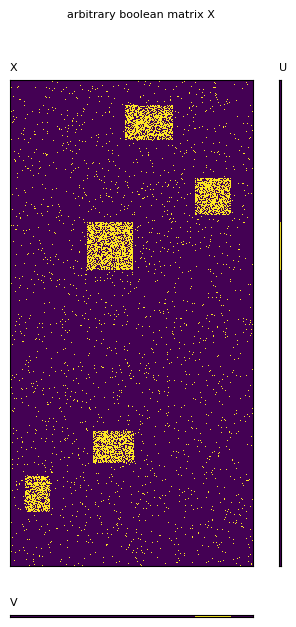

In [3]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## I. Reconstruction task

In [4]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

### 1. Manually select tau
k and w are not effective here.

[I] k            : 5
[I] algorithm    : penalty
[I] reg          : 10
[I] reg_growth   : 3
[I] eps          : 0.01
[I] max_iter     : 100
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.
[I] k            : 5
[I] seed         : 1702413577
[I] init         : random
[I] max_iter     : 2000
[W] Missing validation data.
[I] After initialization: max U: 1.704, max V: 1.010


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_compressed.py:291: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


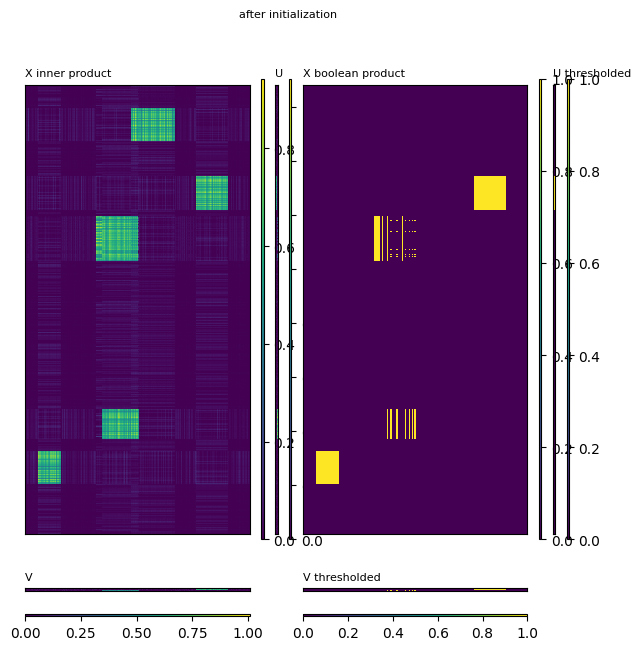

[I] After normalization: max U: 0.971, max V: 0.971


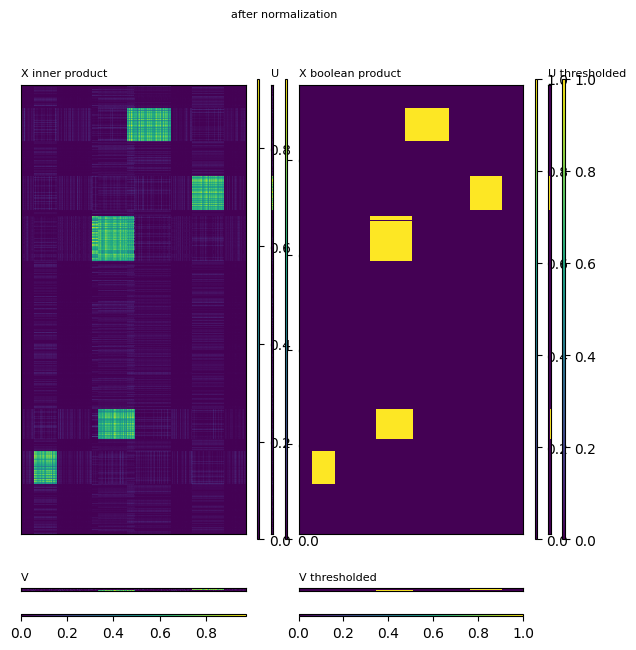

[I] iter: 0, reg: 1.0e+01, err: 33.538, rec_err: 16275.787, reg_err: 33.538
[I] iter: 1, reg: 3.0e+01, err: 31.294, rec_err: 16284.042, reg_err: 31.294
[I] iter: 2, reg: 9.0e+01, err: 28.129, rec_err: 16325.727, reg_err: 28.129
[I] iter: 3, reg: 2.7e+02, err: 23.663, rec_err: 16460.092, reg_err: 23.663
[I] iter: 4, reg: 8.1e+02, err: 18.791, rec_err: 16729.935, reg_err: 18.791
[I] iter: 5, reg: 2.4e+03, err: 14.166, rec_err: 17124.147, reg_err: 14.166
[I] iter: 6, reg: 7.3e+03, err: 10.201, rec_err: 17620.930, reg_err: 10.201
[I] iter: 7, reg: 2.2e+04, err: 7.110, rec_err: 18190.633, reg_err: 7.110
[I] iter: 8, reg: 6.6e+04, err: 4.840, rec_err: 18784.714, reg_err: 4.840
[I] iter: 9, reg: 2.0e+05, err: 3.238, rec_err: 19352.436, reg_err: 3.238


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


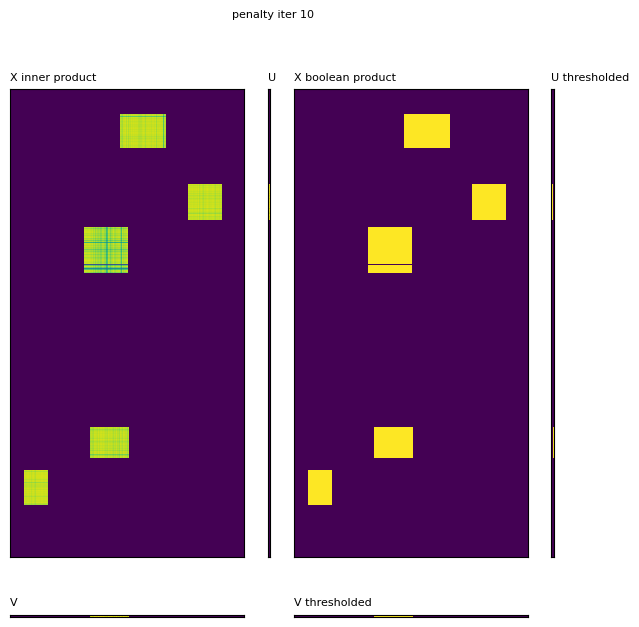

[I] iter: 10, reg: 5.9e+05, err: 2.131, rec_err: 19858.615, reg_err: 2.131
[I] iter: 11, reg: 1.8e+06, err: 1.372, rec_err: 20287.793, reg_err: 1.372
[I] iter: 12, reg: 5.3e+06, err: 0.851, rec_err: 20638.270, reg_err: 0.851
[I] iter: 13, reg: 1.6e+07, err: 0.511, rec_err: 20918.101, reg_err: 0.511
[I] iter: 14, reg: 4.8e+07, err: 0.315, rec_err: 21130.936, reg_err: 0.315
[I] iter: 15, reg: 1.4e+08, err: 0.204, rec_err: 21281.142, reg_err: 0.204
[I] iter: 16, reg: 4.3e+08, err: 0.135, rec_err: 21386.006, reg_err: 0.135
[I] iter: 17, reg: 1.3e+09, err: 0.089, rec_err: 21461.028, reg_err: 0.089
[I] iter: 18, reg: 3.9e+09, err: 0.057, rec_err: 21514.823, reg_err: 0.057
[I] iter: 19, reg: 1.2e+10, err: 0.035, rec_err: 21553.258, reg_err: 0.035


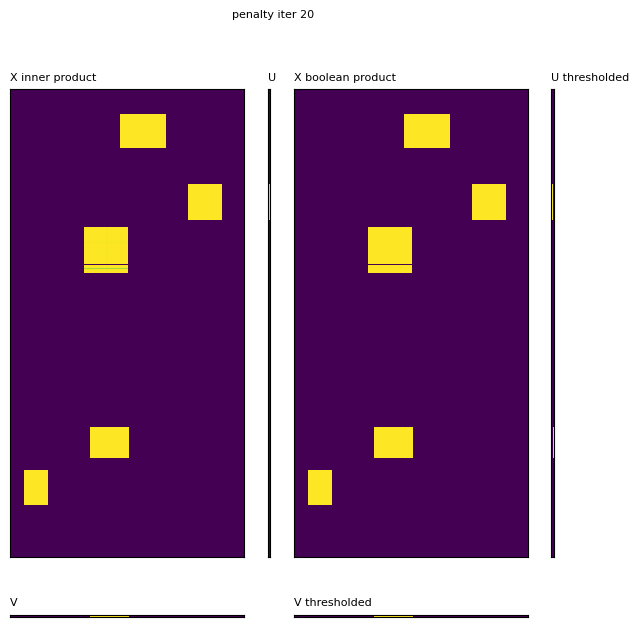

[I] iter: 20, reg: 3.5e+10, err: 0.021, rec_err: 21580.605, reg_err: 0.021
[I] iter: 21, reg: 1.0e+11, err: 0.012, rec_err: 21599.943, reg_err: 0.012
[I] iter: 22, reg: 3.1e+11, err: 0.006, rec_err: 21613.507, reg_err: 0.006
[W] Stopped in advance: Error lower than threshold


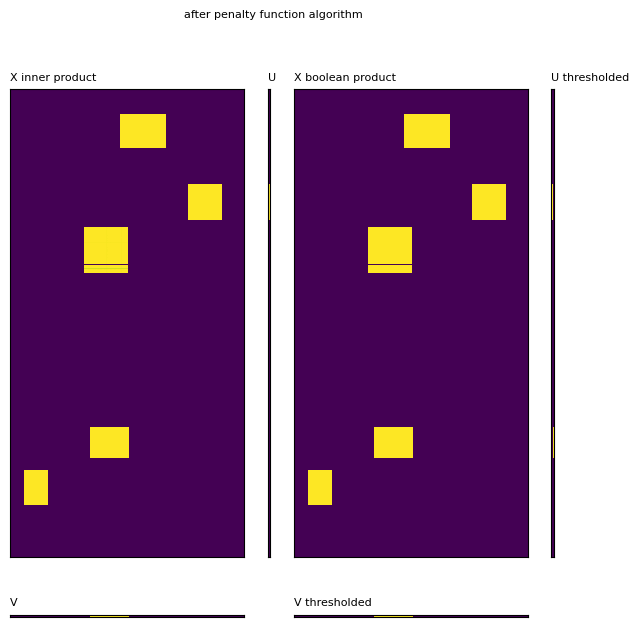

In [5]:
k = 5

bmf = bMFPenalty(k=k, reg_growth=3)
bmf.fit(X_train, display=True, scaling=0.5)

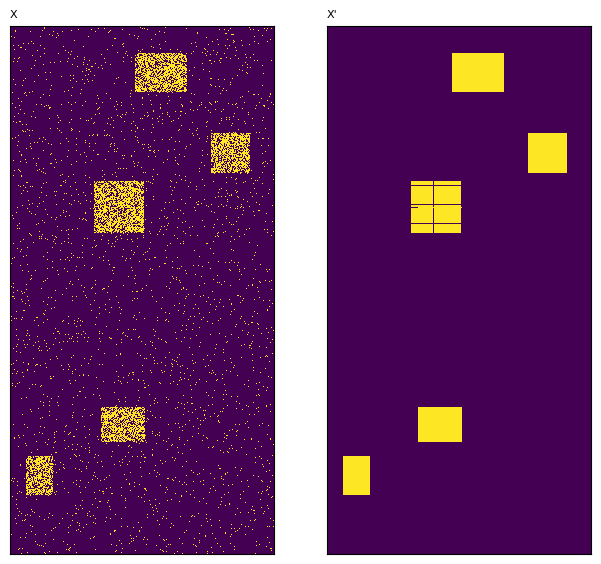

In [6]:
from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(bmf.U, bmf.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings, scaling=0.5)